<a href="https://colab.research.google.com/github/MihirSaiDudekula/ML_cohort/blob/master/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Heart disease using ML model


# **1. Problem Definition**
Given clinical parameters about a patient, can we predict whether or not they have heart disease?


The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    - anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# **2. Importing our tools**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
# LogisticRegression is a machine learning model used for binary classification tasks.
# It's commonly used when the target variable is categorical with two possible outcomes.
# linear model refers to the fact that the relationship between the input features and the output variable is assumed to be linear


from sklearn.neighbors import KNeighborsClassifier
# if we plot all the data on a graph, and for the required data point, we find the
# k nearest neighbors, that is if k=5, then 5 points nearest to required point, and we predict that whatever is closer to our point
# that is tour prediction. so if a given data with k=5 has 4 elements closer to yes and 1 to no, then we predict yes


from sklearn.ensemble import RandomForestClassifier
# random forest algorithm builds multiple decision trees and combines their predictions to make a
# more accurate and robust prediction overall.
# It's like pooling the wisdom of many different strategies to make a better guess.
# decision trees are a series of yes or no questions in a tree format
# random forest comes under ensemble method as it runs multiple trees to make accurate predictions


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
# function splits a dataset into training and testing subsets.
# cross-val-score : evaluates the model's performance by
# splitting the data into multiple subsets (folds) and training the model on each fold while testing it on the remaining folds.


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# These techniques help find the best combination of hyperparameters
# for a machine learning model by systematically searching through a predefined set of hyperparameters.


from sklearn.metrics import confusion_matrix, classification_report
# confusion matrix, which is a table that summarizes
# the performance of a classification model by comparing the predicted and actual class labels.

# classification_report: This function generates a text report that includes
# precision, recall, F1-score, and support for each class in a classification problem.


from sklearn.metrics import precision_score, recall_score, f1_score
# common metrics used to evaluate the performance of classification models.

# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay
# a curve b/w false and true positives rate, it is used to describe how good a model is
# atleast how much better than 50/50 guessing

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Mon Apr 29 14:18:46 2024


In [2]:
df = pd.read_csv("6.1 heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **3. Data exploration (Exploratory Data Analysis - EDA)**

In [23]:
df["target"].value_counts()
# we obtain the split up of how many confirmed heart disease and how many not

target
1    165
0    138
Name: count, dtype: int64

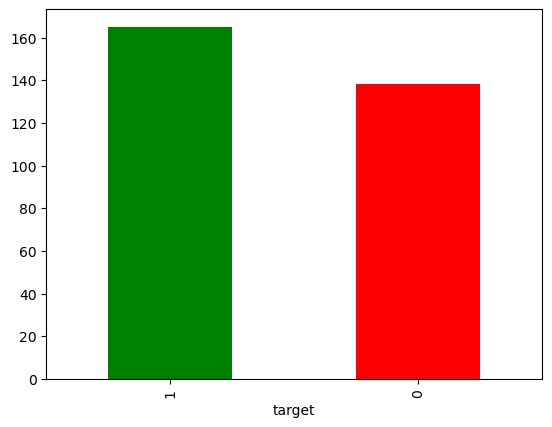

In [24]:
df["target"].value_counts().plot(kind="bar", color=["green","red"]);
# same thing visualised

In [25]:
df.info()
# some info about our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df.isna().sum()
# this gives us the no. of null values in each column of our dataframe

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df.describe()
# some insights on our data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
# lets check disease by gender
# female = 0 , male = 1

# we conclude that men are more likely to get heart-disease than women
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [29]:
pd.crosstab(df.sex,df.target)
# crosstab - cross-tabulation - summarizes the frequency of occurrences of different
# combinations of values from two categorical variables (these variables have 2/more subcategories).

# sex contains 2 sub-categories "male" and "female"
# target contains 2 sub-categories "0" and "1" (false or true)

# so, we can get a summary cross table for
# how many women have disease,how many dont, how many men have, how many dont

target,0,1
sex,,
0,24,72
1,114,93


<Axes: xlabel='sex'>

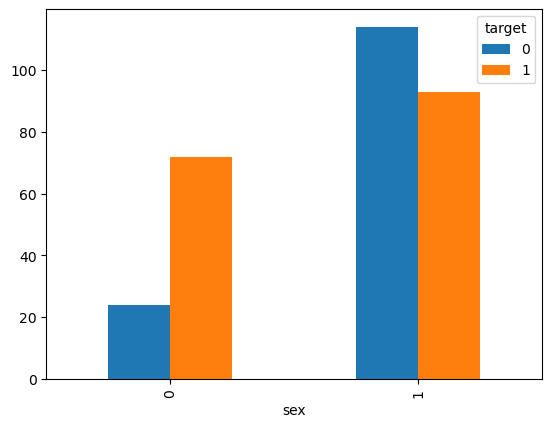

In [30]:
pd.crosstab(df.sex,df.target).plot(kind="bar")
# although males may experience the symptoms more often, they are less likely to have heart disease,
# compared to females,who are more likely to have the disease if they show symptoms

In [31]:
crosstab_percent = pd.crosstab(df.sex, df.target, normalize='index') * 100
# normalise makes it sum up to 1 - that is find a percentage
crosstab_percent

target,0,1
sex,,
0,25.000000,75.000000
1,55.072464,44.927536


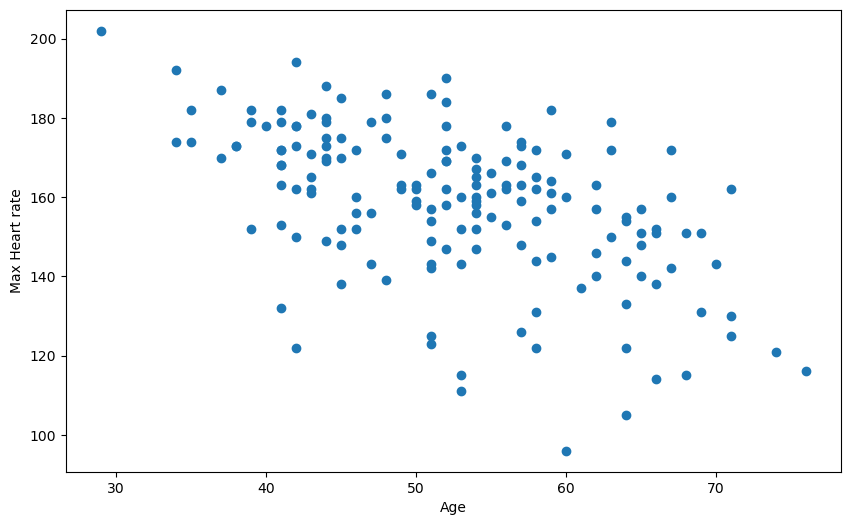

In [32]:
# age vs max heart rate (thalach)

# the plot for age vs max heart rate for patients WITH heart disease

# Create a new figure with a size of 10x6 inches
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1])
# selects the age and heart rate values from the DataFrame df where the corresponding target values are equal to 1

# Add labels
plt.xlabel('Age')
plt.ylabel('Max Heart rate')

# Show the plot
plt.show()

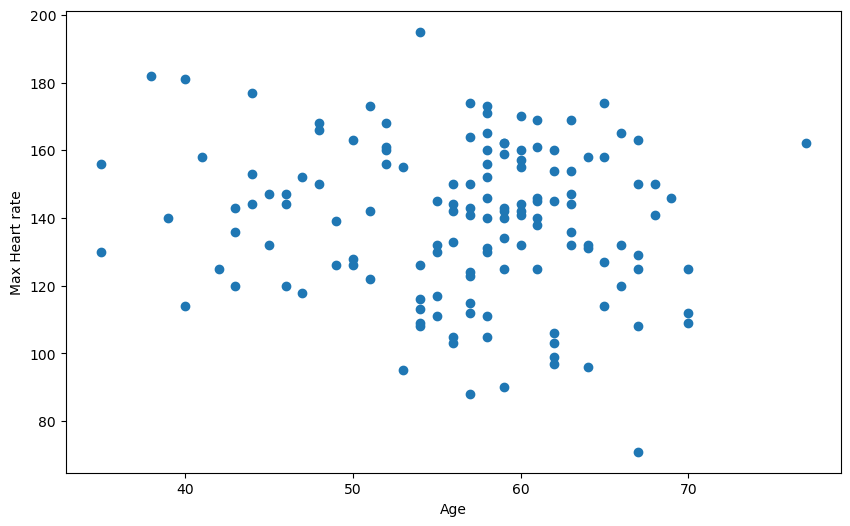

In [33]:
# age vs max heart rate (thalach)

# the plot for age vs max heart rate for patients WITHOUT heart disease

# Create a new figure with a size of 10x6 inches
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==0], df.thalach[df.target==0])
# selects the age and heart rate values from the DataFrame df where the corresponding target values are equal to 1

# Add labels
plt.xlabel('Age')
plt.ylabel('Max Heart rate')

# Show the plot
plt.show()

<Axes: ylabel='Frequency'>

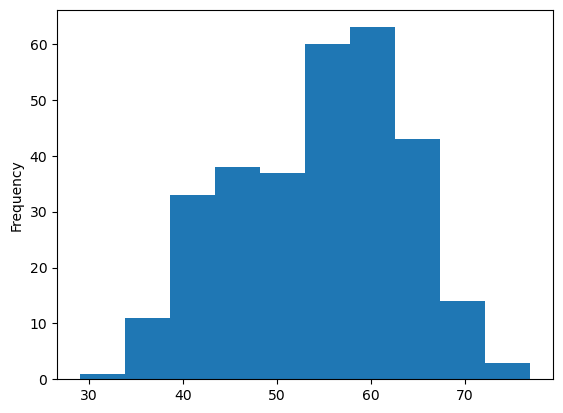

In [34]:
# which age group is most prone? - lets check using a histogram distribution
df.age.plot.hist()

cp - chest pain type
- 0: Typical angina: chest pain related to decrease in blood supply to the heart
- 1: Atypical angina: chest pain not related to the heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain, but not showing signs of disease

In [35]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


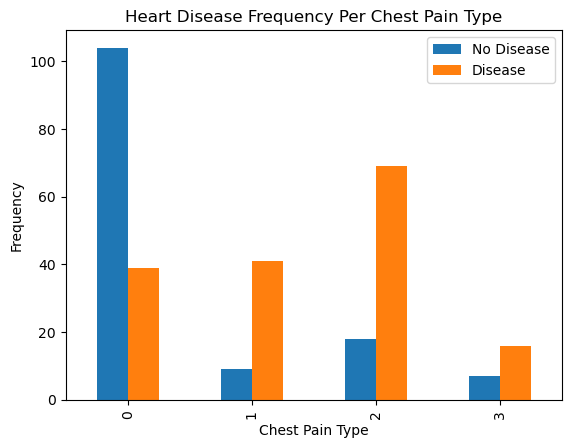

In [36]:
pd.crosstab(df.cp,df.target).plot(kind="bar")

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])

- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
- chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

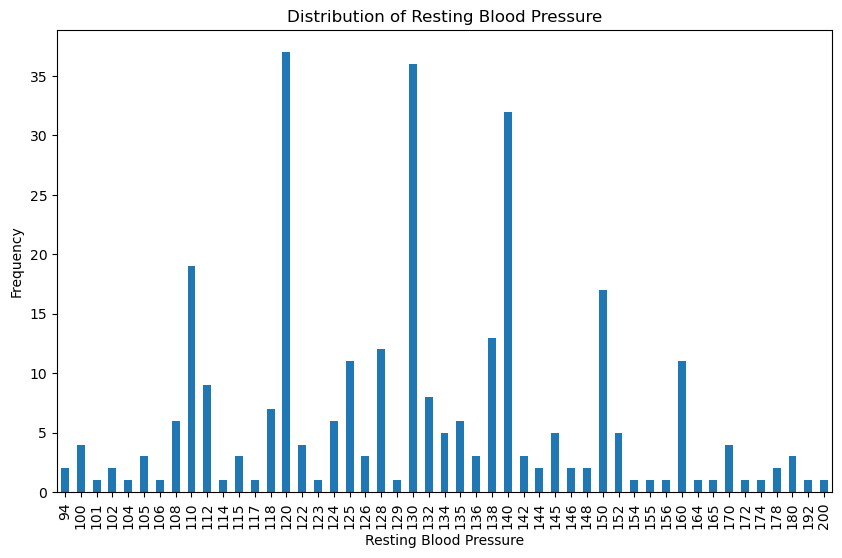

In [37]:
plt.figure(figsize=(10, 6))
df["trestbps"].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Resting Blood Pressure')
plt.show()



In [38]:
# lets compare all of the independent variables in one hit, so that
# it gives us an idea of which independent variables may or may not have an impact on our target variable.
#  using a correlation matrix using df.corr()
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


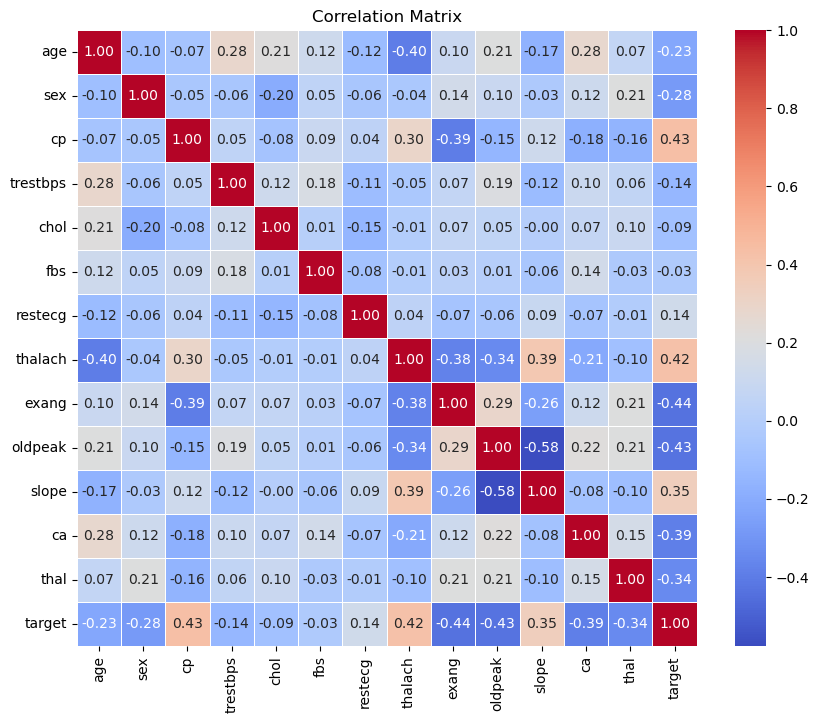

In [47]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
# annot=True displays the correlation values on the heatmap
# cmap='coolwarm' sets the color palette for the heatmap
# linewidths=0.5 adds borders between the squares
# fmt='.2f' formats the correlation values to two decimal places
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set the title of the plot
plt.title('Correlation Matrix')

# Display the plot
plt.show()


In [66]:
df.chol[df.target==1].describe()
# on average those who have heart disease have 242 cholestrol

count    165.000000
mean     242.230303
std       53.552872
min      126.000000
25%      208.000000
50%      234.000000
75%      267.000000
max      564.000000
Name: chol, dtype: float64

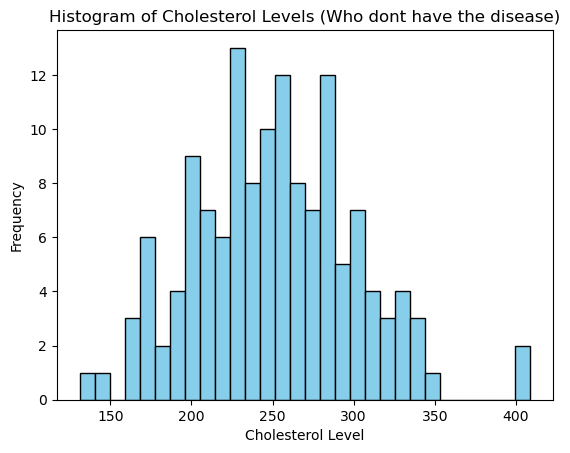

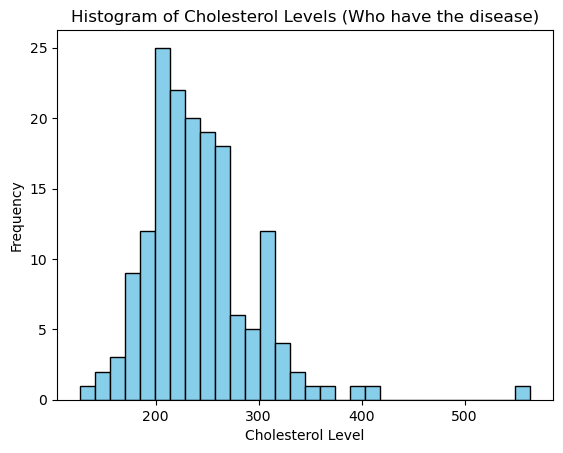

In [62]:
plt.hist(df.chol[df.target==0], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol Levels (Who dont have the disease)')
plt.show()

plt.hist(df.chol[df.target==1], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol Levels (Who have the disease)')
plt.show()

# bins simply indicates the width of individual histogram bars

In [85]:
pd.crosstab(df.fbs,df.target)

target,0,1
fbs,,
0,116,142
1,22,23


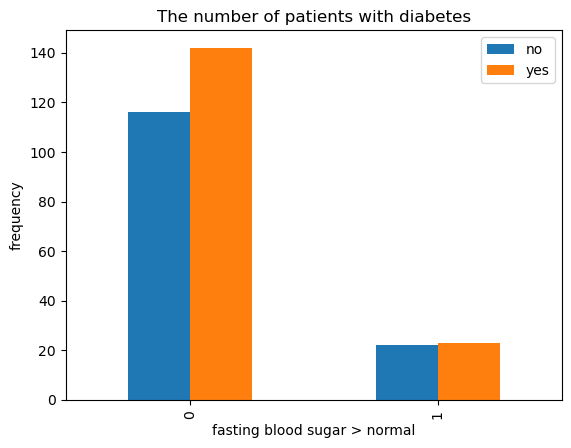

In [84]:
pd.crosstab(df.fbs,df.target).plot(kind="bar")
plt.xlabel("fasting blood sugar > normal")
plt.ylabel("frequency")
plt.title("The number of patients with diabetes")
plt.legend(["no","yes"])

In [1]:
# **ML modelling and predictions**


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = df.drop("target",axis=1)
y = df["target"]

In [7]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [18]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [19]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [20]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [20]:
np.random.seed(42)
# Initialize the model
model = LogisticRegression(solver='lbfgs', max_iter=2000)  
# Increase max_iter to 2000
# Fit the model to the data
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [21]:
# Evaluate the model and return its score
lrscore = model.score(X_test, y_test)
lrscore

0.8852459016393442

In [22]:
np.random.seed(42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
kncscore = model.score(X_test,y_test)
kncscore

0.6885245901639344

In [24]:
np.random.seed(42)
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
rfcscore = model.score(X_test,y_test)
rfcscore

0.8360655737704918

In [26]:
lrscore,kncscore,rfcscore

(0.8852459016393442, 0.6885245901639344, 0.8360655737704918)

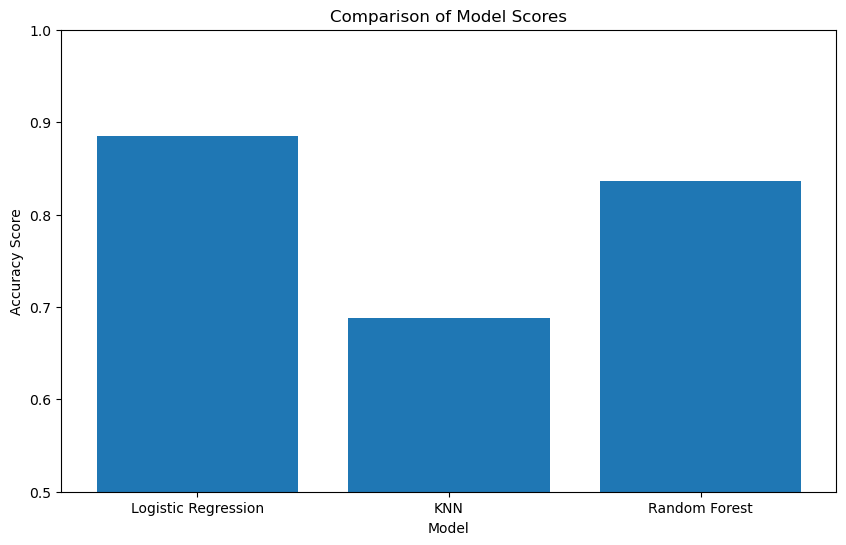

In [27]:
import matplotlib.pyplot as plt

# Dictionary containing model names and their corresponding scores
model_scores = {
    "Logistic Regression": lrscore,
    "KNN": kncscore,
    "Random Forest": rfcscore
}

# Convert the dictionary into lists for plotting
model_names = list(model_scores.keys())
scores = list(model_scores.values())

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Scores')
plt.ylim(0.5, 1.0)  # Set y-axis limits for better visualization
plt.show()


In [28]:
#  a model's first predictions aren't always the perfect predicitons,
#  there is a lot of improvement that can be done here
# - Hypyterparameter tuning
# - Feature importance
# - Confusion matrix
# - Cross-validation
# - Precision
# - Recall
# - F1 score
# - Classification report
# - ROC curve
# - Area under the curve (AUC)

In [29]:
# lets tune the hyperparameters and improve the model KNN                     

train_scores = []
test_scores = []
# two empty lists train_scores and test_scores to store
# the training & testing scores of the KNN model for diff values of n_neighbors

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)
# creates a range of values from 1 to 20 for the parameter n_neighbors, 
# representing the number of neighbors to consider for classification in the KNN algorithm.


# Setup KNN instance
knn = KNeighborsClassifier()
# default value for n_neighbors is 5.

# Loop through different n_neighbors

# For each value of n_neighbors, the KNN model is instantiated 
# (knn = KNeighborsClassifier()), and the n_neighbors parameter is set to 
# the current value of i using knn.set_params(n_neighbors=i).


for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    

In [30]:
(train_scores)

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
# the thing about KNN and its neighbors

# KNN makes its predictions based of the values of its N nearest neighbors

# if the N value taken is too small, then the model gets very few perspectives
# to make its decision.This can lead to the model memorizing the exact details 
# of the training data, which might not generalize well to new, unseen data.

# If the N value taken is too large, there is too much data to look into,
# so the training scores show a downward trend while test scores go up


In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


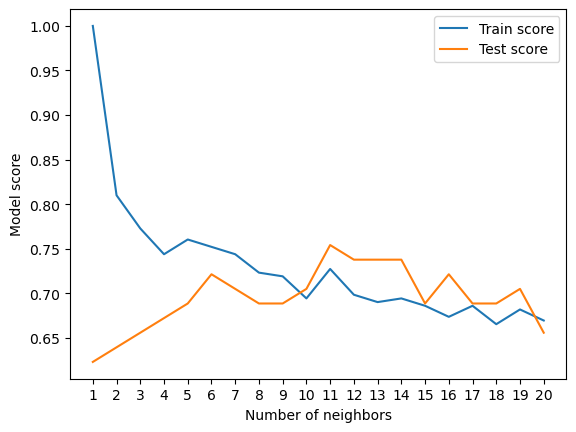

In [33]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [34]:
# some technical terms with knn

# Noise: outliers in the training data, which decreases the accuracy score.

# Overfitting: memorization the training data leads to 
# Overfitting occurs when the model captures noise or irrelevant patterns in the training data, 
# resulting in poor generalization to unseen data

# class imbalance : if the training data itself has more data of one category 
# of the 2 categories (here they are yes and no heart disease), 
# the knn picks up a bias

# desicion boundary: line or boundary that separates different categories 
# in your data.When the decision boundary is very complex, the model may struggle to 
# capture all the nuances and details in the data, leading to lower accuracy.

In [37]:
cross_val_score(model,X,y,cv=10)

# divides the dataset into k equal-sized folds or subsets. 
# For example, if k=5, it creates 5 folds, 
# each containing approximately 1/5th of the data.

# It iterates k times, each time using one of the folds as 
# the test set and the remaining folds as the training set.
# For each iteration, it trains the model on the training set and 
# evaluates its performance on the corresponding test set using the 
# specified scoring metric.

# After each iteration, it calculates the score of the model's 
# performance based on the specified scoring metric (e.g., accuracy, precision, recall).
# These scores are stored and returned as an array or list.

array([0.87096774, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.86666667, 0.76666667, 0.8       ])

In [35]:
# tunning 
# - LogisticRegression()
# - RandomForestClassifier()
# ... using RandomizedSearchCV

In [ ]:
# RandomizedSearchCV helps you quickly figure out the best settings 
# for your model by randomly trying out different combinations, 
# saving you time and effort compared to testing every single option.

# RandomizedSearchCV trains a model using cross-validation 
# (splitting the training data into multiple subsets) and 
# evaluates its performance using a scoring metric 
# (e.g., accuracy, precision, recall).

 # Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),  
# Create a grid of 20 values for the regularization parameter C, 
# ranging from 10^-4 to 10^4
                "solver": ["liblinear"]}     
# Specify the solver algorithm to be used 
# (here, "liblinear" for logistic regression)

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),        
# Create a grid of values for the number of trees in the random forest, 
# ranging from 10 to 1000 with a step size of 50
           "max_depth": [None, 3, 5, 10],                 
# Specify the maximum depth of the trees in the random forest 
# (None means no maximum depth)
# so we check for 0,3,5,10 tree depths
           "min_samples_split": np.arange(2, 20, 2),      
# Create a grid of values for the minimum number of samples required 
# to split an internal node, ranging from 2 to 20 with a step size of 2
           "min_samples_leaf": np.arange(1, 20, 2)}      
# Create a grid of values for the minimum number of samples required to
# be at a leaf node, ranging from 1 to 20 with a step size of 2
